# Code for reproducing figures
Jupyter notebook accompanying "Predictive coding is a consequence of energy efficiency in recurrent neural networks".
This notebook produces the main figures in the paper and gives a simple example of how you can train this model.

In [29]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook
%matplotlib inline

import torch
import torchvision
import torch.nn.functional as F
import numpy as np
import pandas as pd
from typing import Tuple, List, Callable, Optional
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from functions import *

if torch.cuda.is_available():
    DEVICE = 'cuda'
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    DEVICE = 'cpu'

print('Using {}'.format(DEVICE))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cpu


Constants

In [30]:
INPUT_SIZE = 28*28 # for accurate reproduction leave this unchanged
BATCH_SIZE = 32
SEQ_LENGTH = 10
LOSS_FN = L1Loss

Local imports

In [31]:
import mnist
import plot
import Network
from train import train

Load MNIST dataset

In [32]:
training_set, validation_set, test_set = mnist.load(val_ratio=0.0)

Create a network definition for one model, note that 'term' and 'beta' are artifacts of earlier iterations of the model where we e.g. incorporated magnitudes of the weights into the objective. You should leave these unchanged. 

In [33]:
term = 'c' # leave unchanged
beta = 0 # leave unchanged
net = Network.State(activation_func=torch.nn.ReLU(),
            optimizer=torch.optim.Adam,
            lr=1e-4,
            beta=beta,
            input_size=INPUT_SIZE,
            hidden_size=INPUT_SIZE,
            title="networks/relu-weight-act-l1-"+str(term)+'-'+str(beta),
            term=term,
            device=DEVICE)

The following code can, if uncommented, be used to train the models:

In [34]:
# train(net,
#       train_ds=training_set,
#       test_ds=test_set,
#       loss_fn=LOSS_FN,
#       num_epochs=200,
#       batch_size=BATCH_SIZE,
#       sequence_length=SEQ_LENGTH,
#       verbose=False)

However, a pre-trained model is available and you can load that in. This network is used to produce figure 3, figure 4 ,figure 5A and the figures in appendix A in the paper.

In [35]:
net.load()

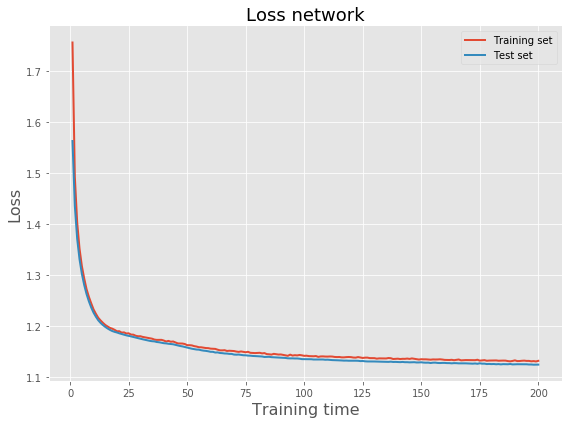

In [36]:
plot.training_progress(net, save=False)

Here, we retrieve the 10 model instances used to produce figure 2 and 5B in the figure

In [37]:
net_list = []
n_instances = 10
for i in range(1, n_instances + 1):
    net = Network.State(activation_func=torch.nn.ReLU(),
            optimizer=torch.optim.Adam,
            lr=1e-4,
            beta=beta,
            input_size=INPUT_SIZE,
            hidden_size=INPUT_SIZE,
            title="networks/relu"+str(i)+"-weight-act-l1-"+str(term)+'-'+str(beta),
            term=term,
            device=DEVICE)
    net.load()
    net_list.append(net)

Computes the preactivations of the networks and respective preactivation bounds (input, data median and category median) (fig 2 and fig 5B in the paper)

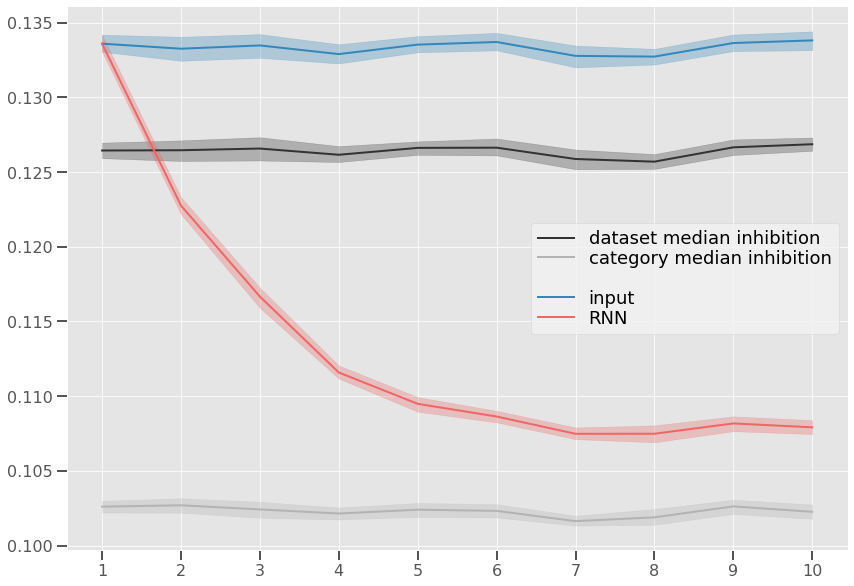

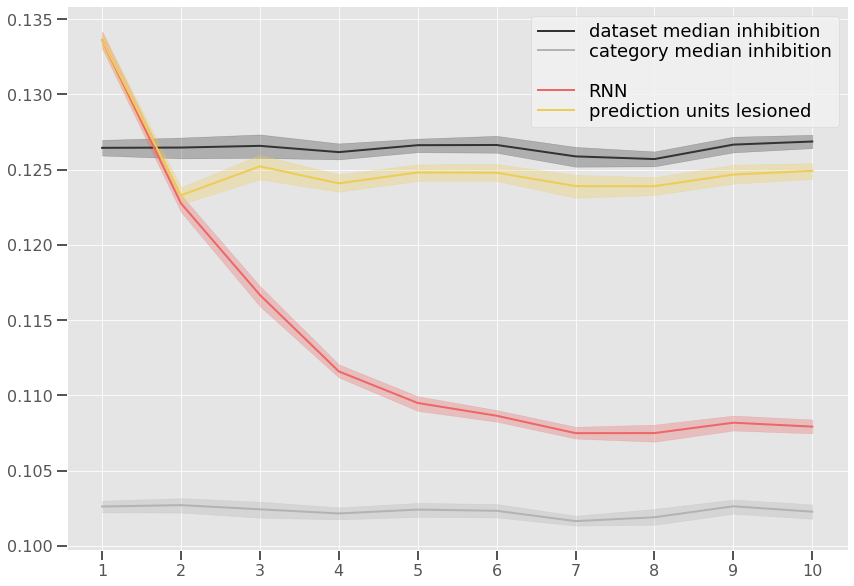

In [38]:
plot.bootstrap_model_activity(net_list, training_set, test_set, seed=None, save=True)

Produces figure 3 in the paper

<Figure size 216x216 with 0 Axes>

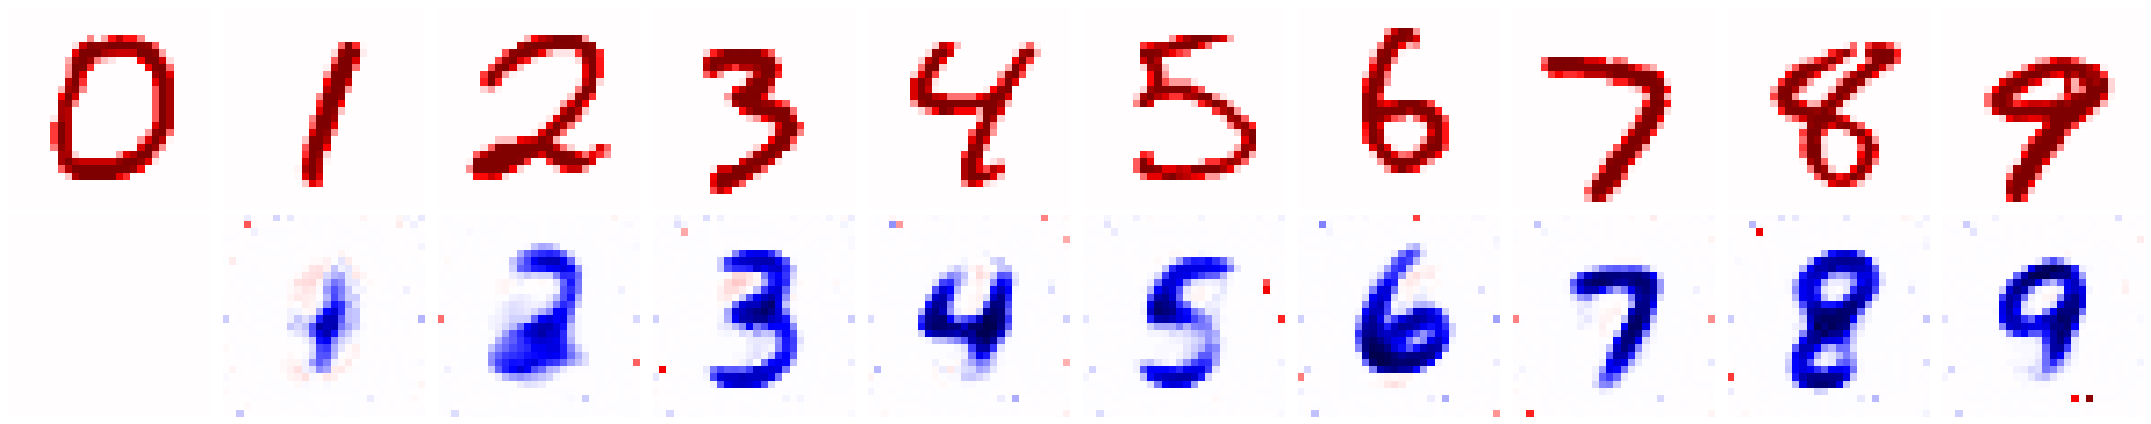

In [43]:
plot.example_sequence_state(net, test_set, save=True)

Figure 4

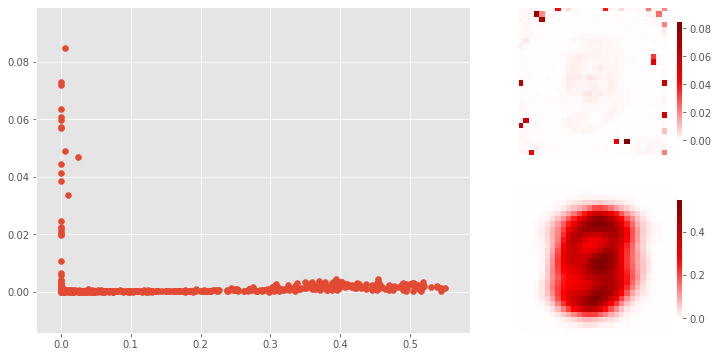

In [40]:
plot.xdrive_pdrive(net, test_set, save=True)

Produces figures in Appendix A

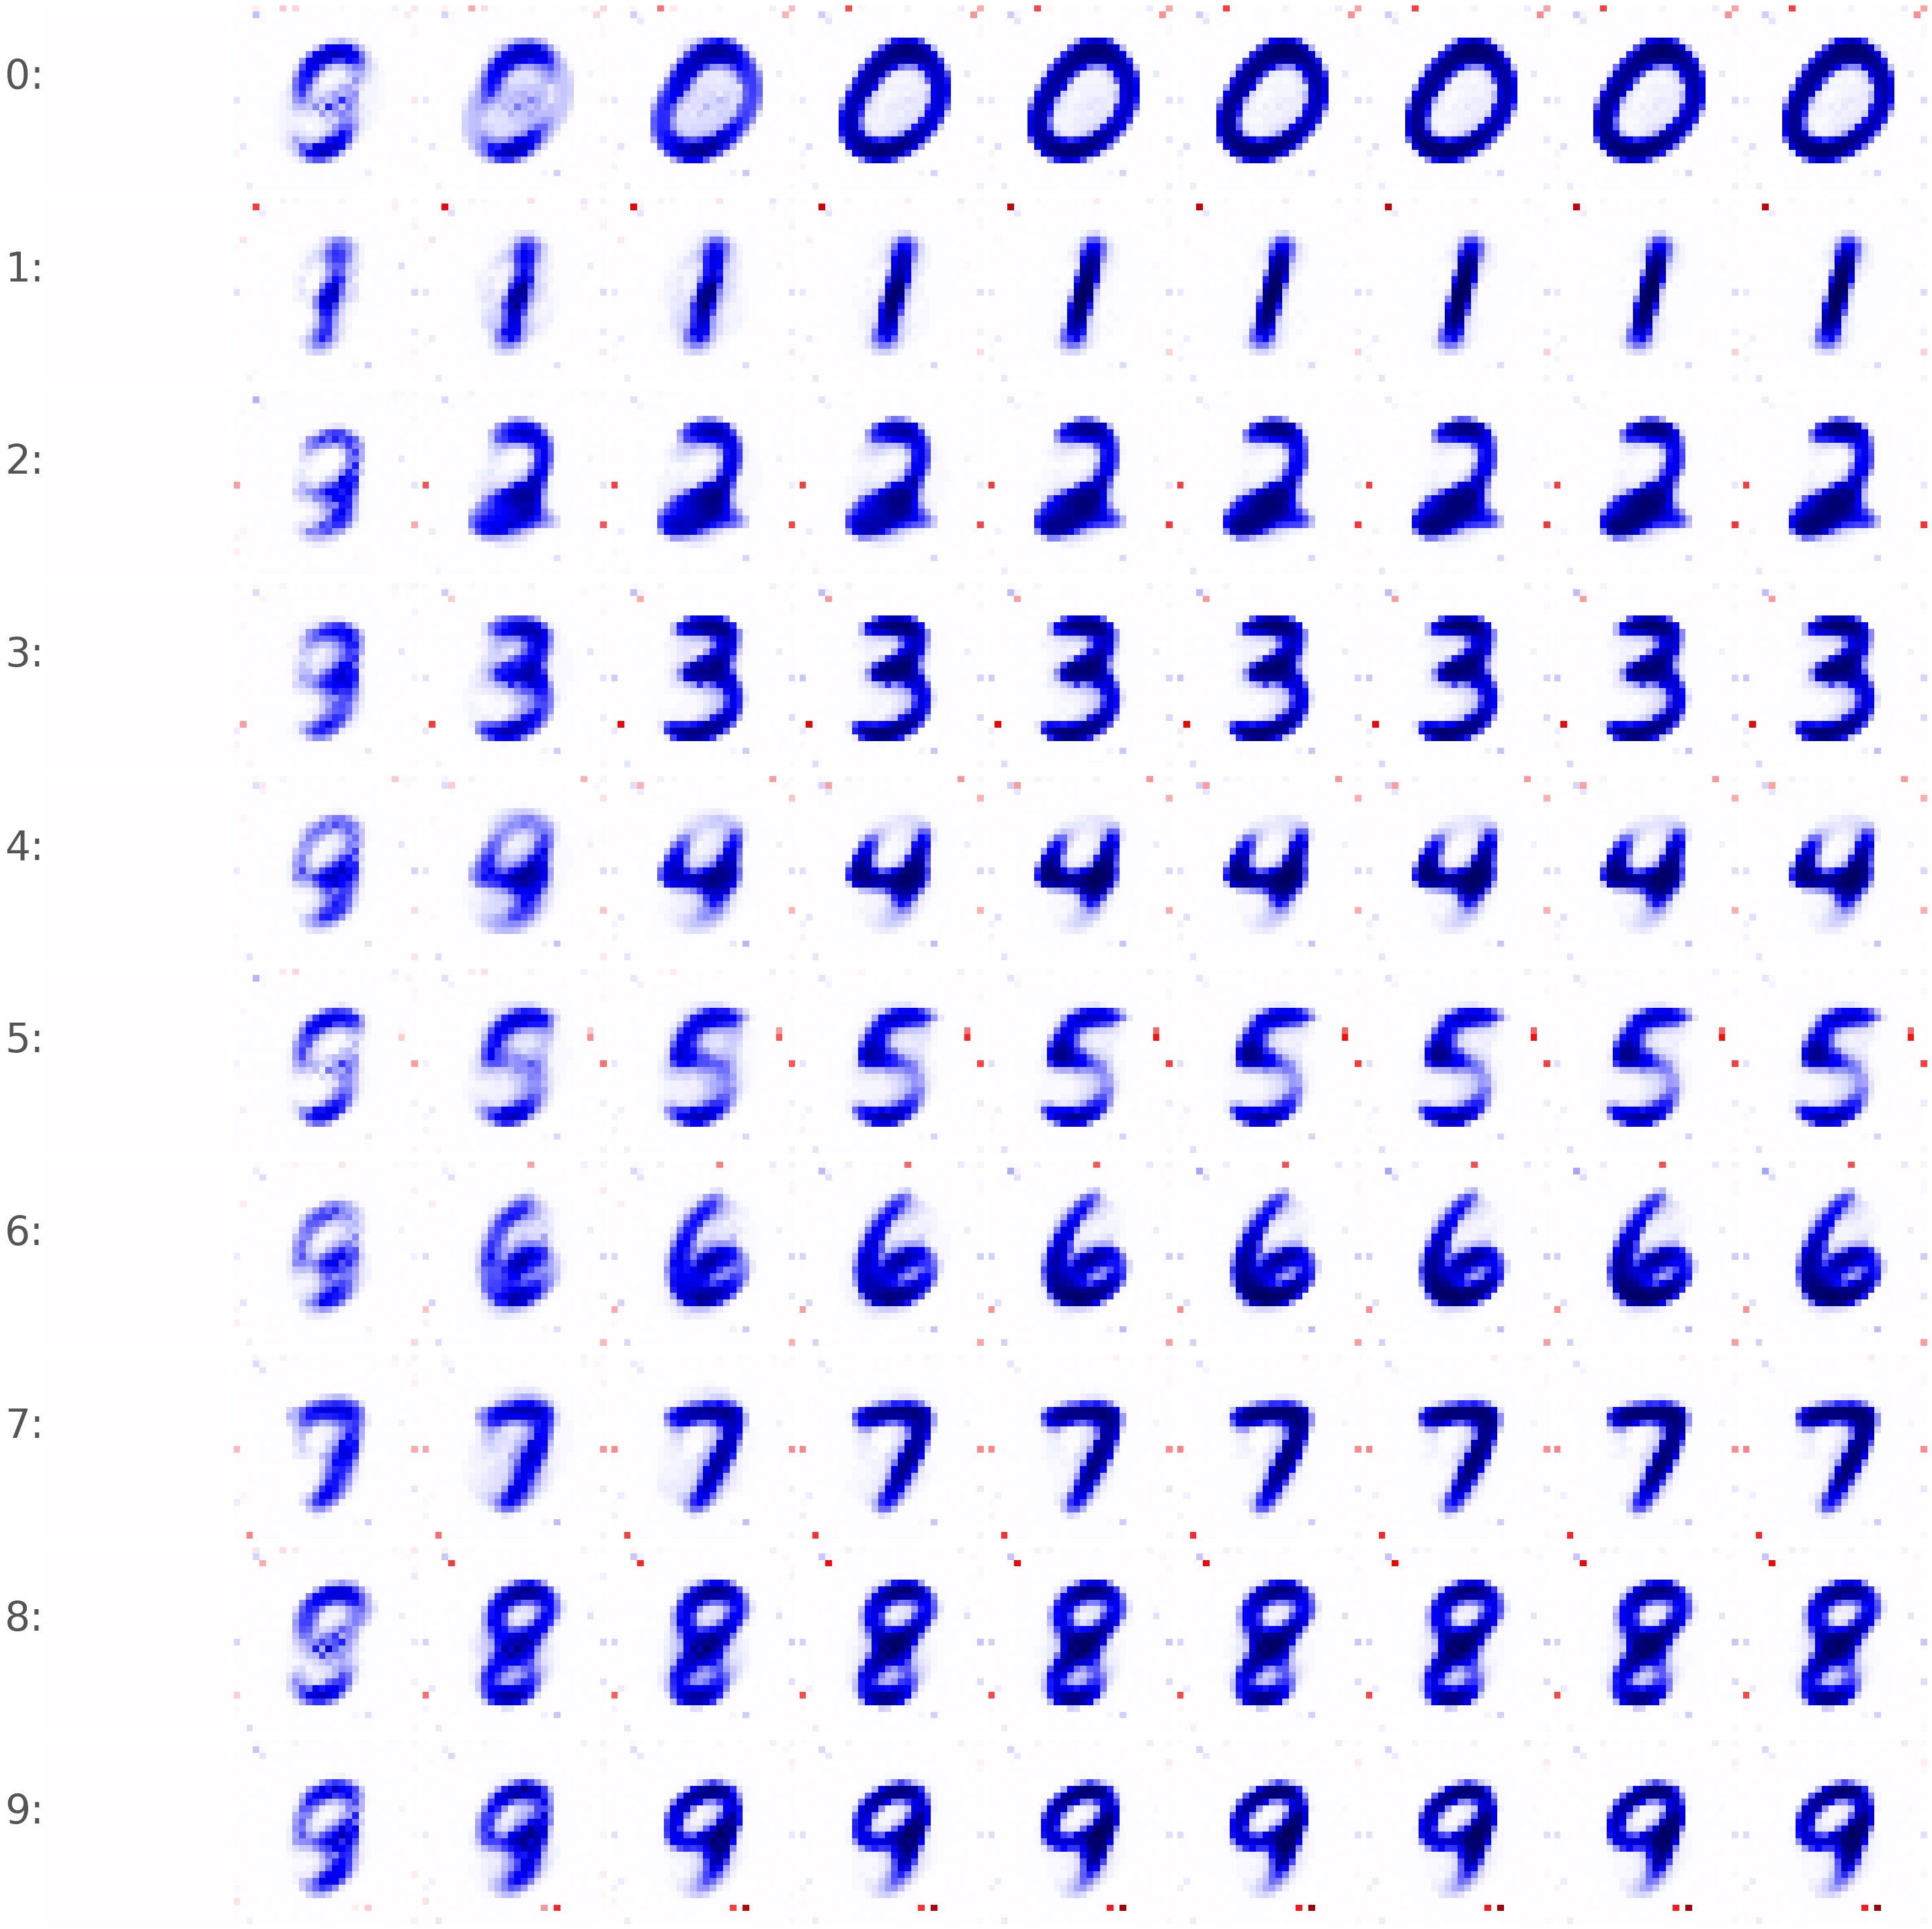

In [41]:
plot.pred_after_timestep(net, test_set, mask=None, save=True)

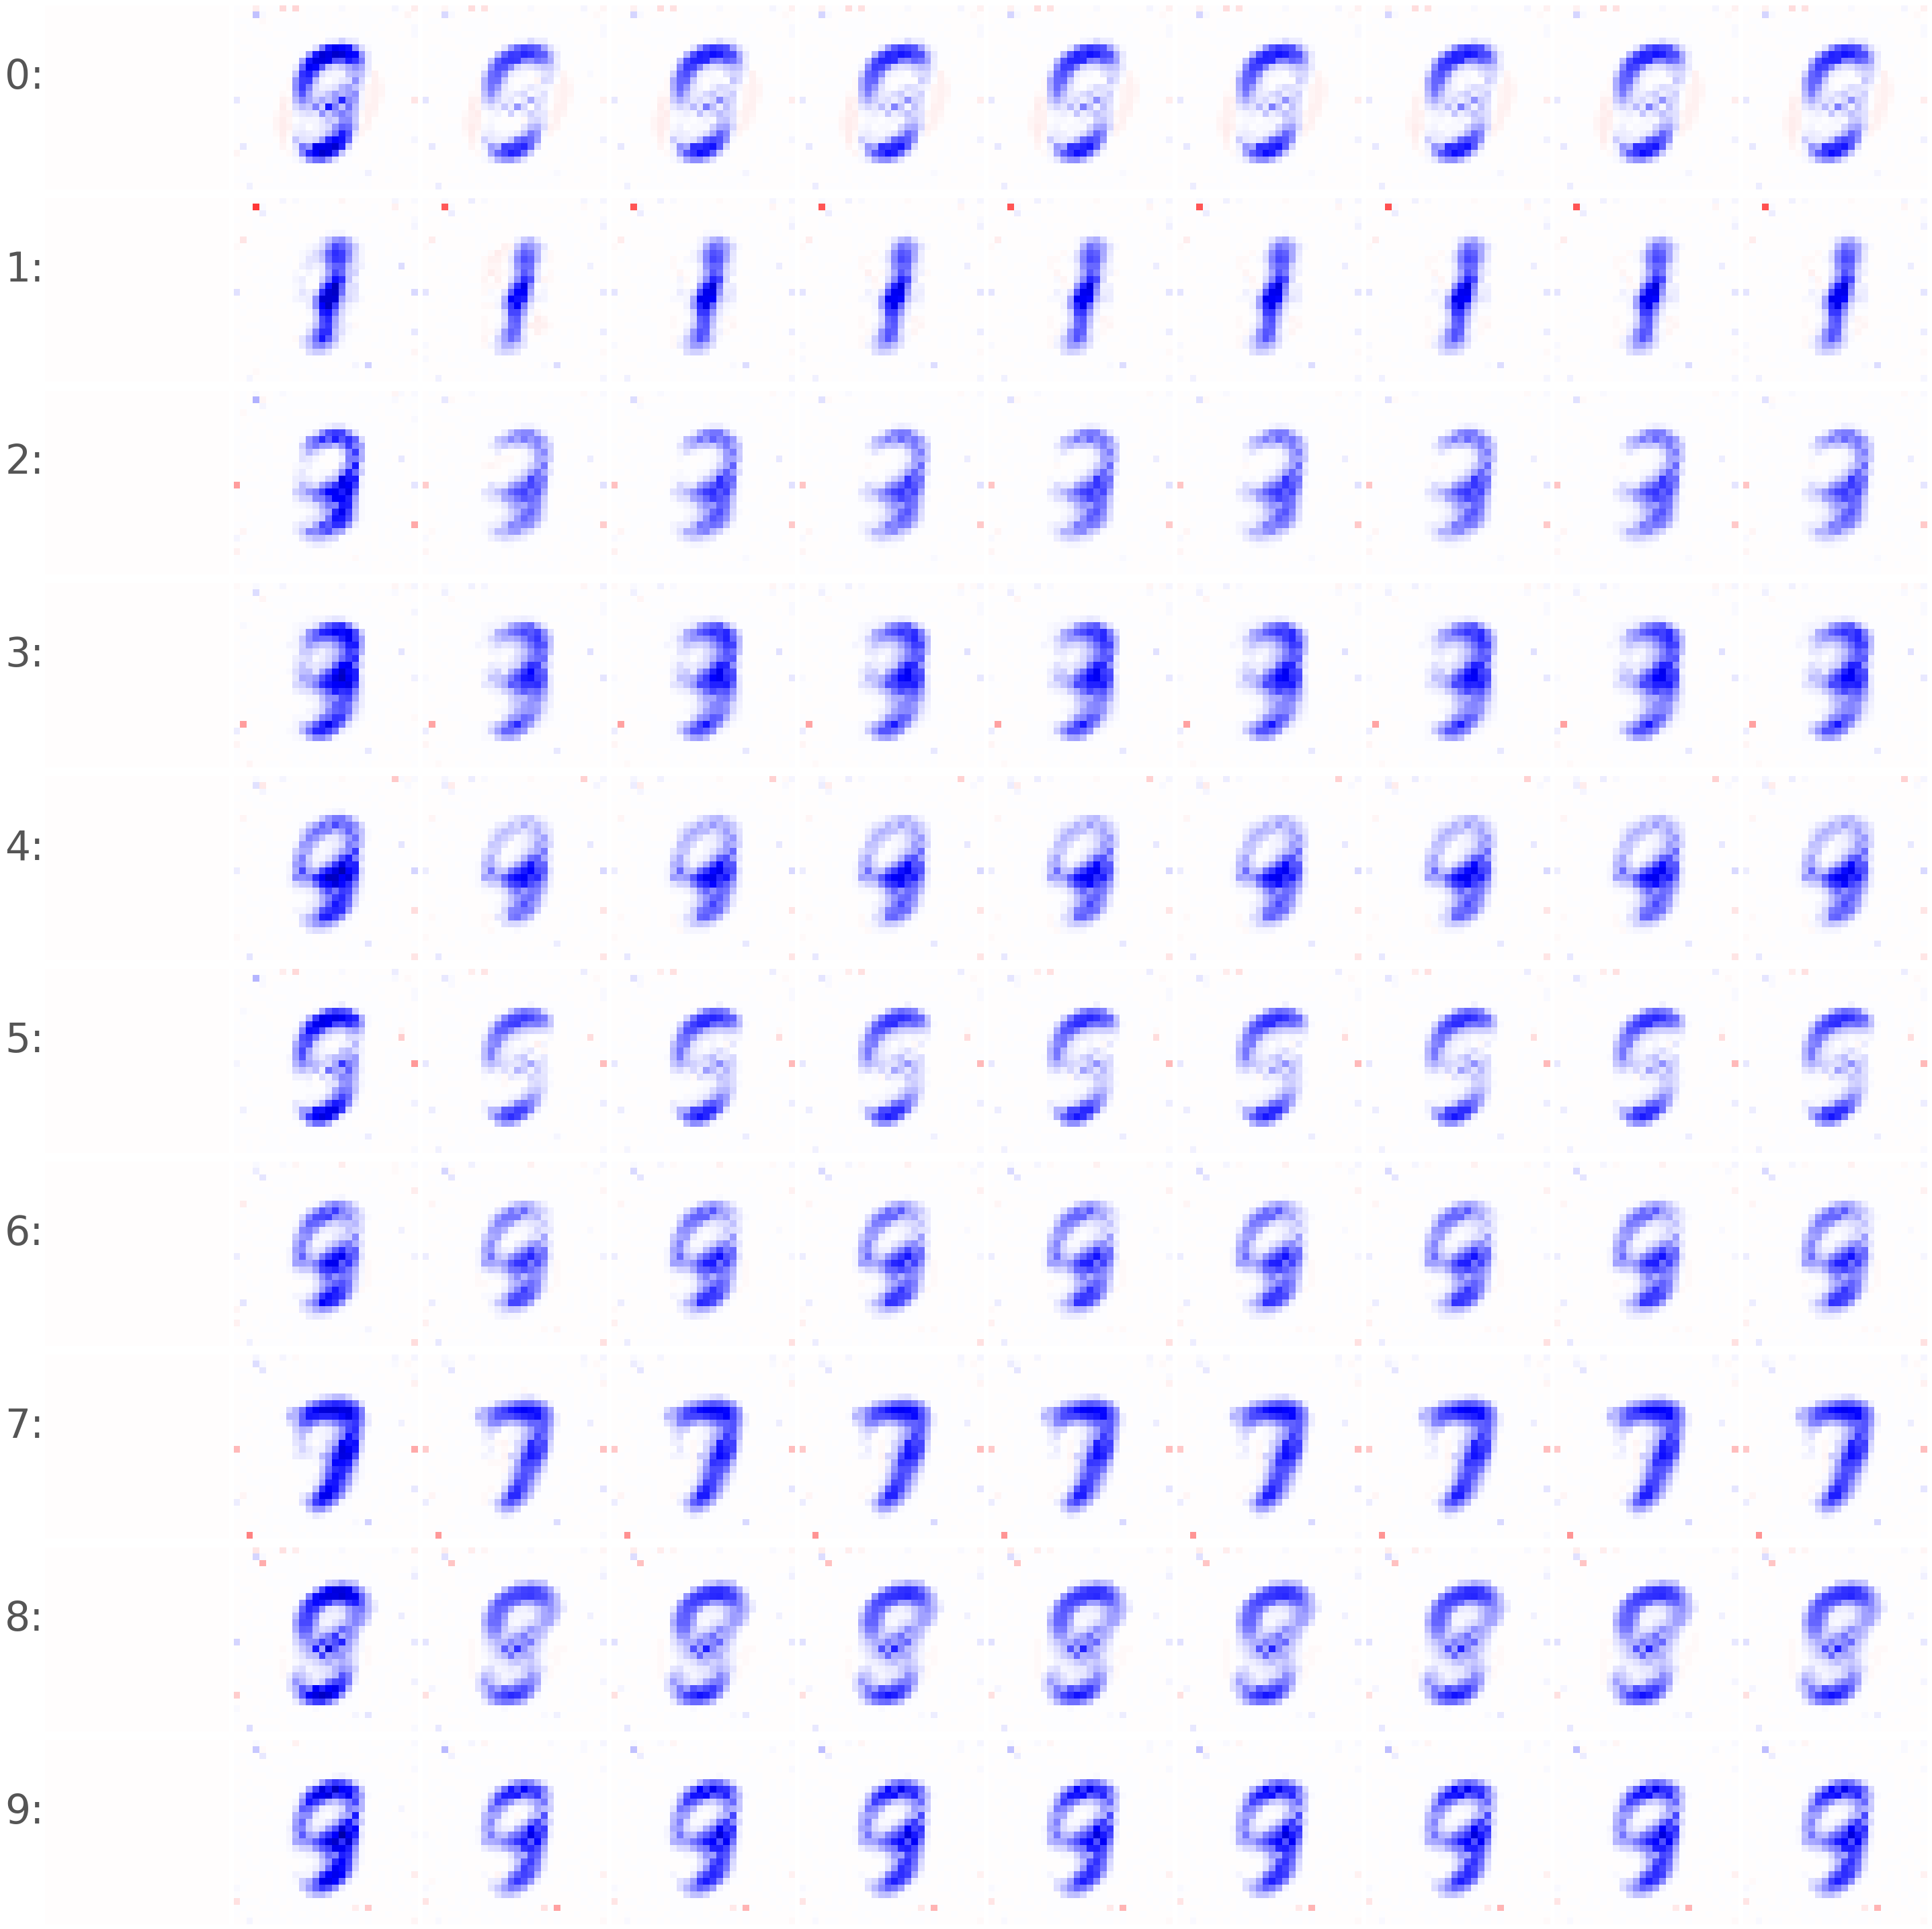

In [42]:
plot.pred_after_timestep(net, test_set, mask=plot._pred_mask(net, test_set), save=True)